## KNN Classification
K-Nearest Neighbors (KNN) classification is a simple yet effective algorithm for solving classification problems. The mathematical intuition behind KNN classification can be understood through the following steps:

Data Representation: Let's consider a dataset consisting of labeled examples, where each example is represented by a set of features and belongs to a specific class. The features can be represented as points in a multi-dimensional space, where each dimension corresponds to a specific feature. This representation allows us to measure the similarity or distance between data points.

Distance Metric: The choice of distance metric is crucial in KNN classification. Commonly used distance metrics include Euclidean distance, Manhattan distance, and Minkowski distance. Euclidean distance is often used as it calculates the straight-line distance between two points in a multi-dimensional space. The distance metric determines how "close" or "similar" two data points are.

K-Nearest Neighbors: Given a new, unlabeled data point, the KNN algorithm identifies its K nearest neighbors from the labeled dataset based on the chosen distance metric. The value of K is a hyperparameter that needs to be specified prior to running the algorithm.

Voting: Once the K nearest neighbors are identified, the algorithm looks at their class labels. In a binary classification scenario, if a majority of the neighbors belong to one class, the new data point is assigned that class. In a multi-class classification scenario, the algorithm can use various voting schemes, such as majority voting or weighted voting, to determine the class label.

Decision Boundary: The decision boundary in KNN classification is the region in the feature space that separates different classes. The decision boundary is defined by the distribution of the labeled data points. The shape and location of the decision boundary depend on the distance metric, the value of K, and the distribution of the data.

Prediction: Finally, once the new data point is assigned a class label based on the voting scheme, it is considered the predicted class for that data point.

Overall, the mathematical intuition behind KNN classification revolves around measuring the distance between data points, finding the nearest neighbors, and using their class labels to predict the class of a new data point. The simplicity of the algorithm lies in its ability to make predictions based on local information without explicitly fitting a model to the data.

## Vistualization of KNN

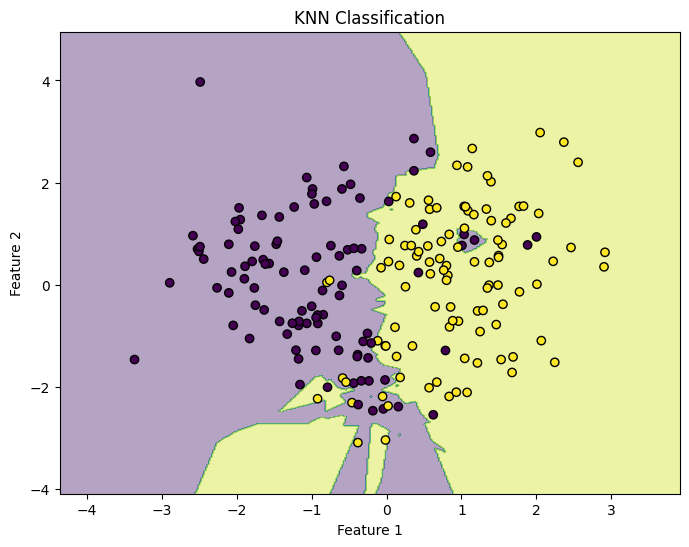

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier

# Generate a synthetic dataset
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Fit the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

# Create a meshgrid to plot the decision boundary
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the class for each meshgrid point
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN Classification')
plt.show()


## The Intuition behnd KD Tree and Ball Tree

Both KD tree and Ball Tree are data structures used for efficient nearest neighbor search in high-dimensional spaces. They provide a way to organize the data points in a hierarchical manner, allowing for faster search operations. Here's the mathematical intuition behind these structures:

KD Tree:

Construction: The KD tree is constructed recursively by partitioning the data points based on their feature values. At each level of the tree, a splitting hyperplane is selected that divides the data points into two subsets.
Splitting Criteria: The splitting hyperplane is chosen by considering the feature with the maximum spread or variance. For example, if the data points are in a 2D space, the splitting hyperplane can be a vertical or horizontal line, depending on the spread of the points in each dimension.
Recursive Partitioning: The partitioning process is applied recursively to each subset of points, creating a binary tree structure. At each level, the split is alternated between different dimensions. This ensures that the resulting tree is balanced and allows for efficient search operations.
Nearest Neighbor Search: To perform a nearest neighbor search in a KD tree, we start at the root node and recursively traverse down the tree. At each node, we compare the target point with the splitting hyperplane to determine which child node to explore next. This process continues until we reach a leaf node, which represents a single data point or a small set of points. We keep track of the closest point found so far and update it if a closer point is found during the traversal.
Pruning: During the search process, we can also prune certain branches of the tree if we can determine that they cannot contain a closer point than the current best. This pruning step further improves the efficiency of the nearest neighbor search.
Ball Tree:

Construction: The Ball Tree is also constructed recursively, but it differs from the KD tree in how it partitions the data points. Instead of using hyperplanes, the Ball Tree partitions the space by enclosing the data points within hyperspheres (balls).
Center and Radius: At each node of the Ball Tree, a center point is selected that represents the center of the enclosed hypersphere. The radius of the hypersphere is determined by the distance from the center to the farthest data point.
Recursive Partitioning: Similar to the KD tree, the partitioning process is applied recursively to each subset of points. The partitioning is done by finding two subsets of points: one that is enclosed by a smaller hypersphere (inner ball) and another that lies outside a larger hypersphere (outer shell).
Nearest Neighbor Search: To perform a nearest neighbor search in a Ball Tree, we start at the root node and recursively traverse down the tree. At each node, we calculate the distance between the target point and the center of the enclosed hypersphere. Based on this distance and the radius of the hypersphere, we determine which child node (inner ball or outer shell) to explore next. As with the KD tree, the search process continues until a leaf node is reached, and we update the closest point found so far.
Pruning: Similar to the KD tree, the Ball Tree can also be pruned to exclude certain branches during the search process if they cannot contain a closer point than the current best.
The mathematical intuition behind KD tree and Ball Tree lies in their ability to partition the data points in a way that allows for efficient nearest neighbor search. The choice of splitting hyperplanes or enclosing hyperspheres is based on the spread of the data and aims to create a balanced tree structure. By recursively traversing the tree and considering the distance between the target point and the partitioning boundaries, the algorithms can efficiently search for the nearest neighbors

## KD Tree

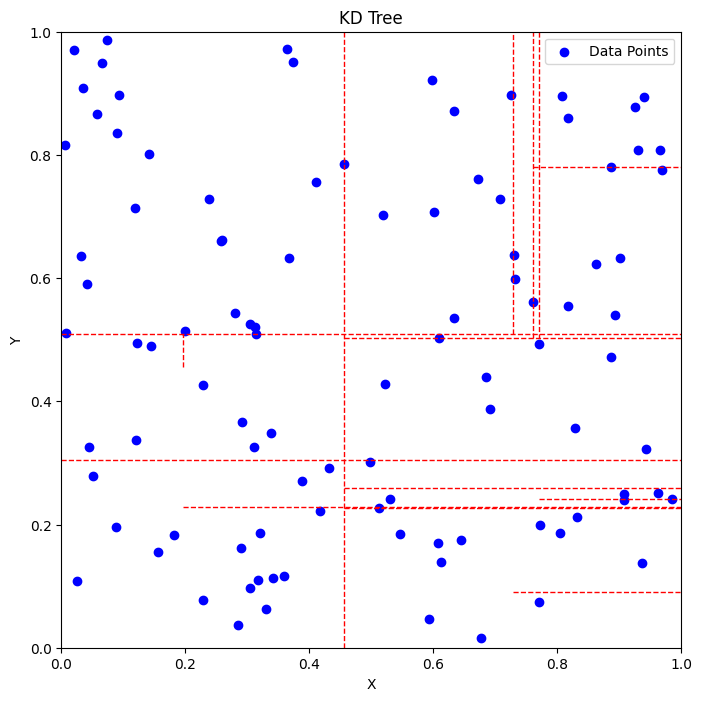

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import KDTree

# Generate a random dataset
np.random.seed(42)
points = np.random.rand(100, 2)

# Construct the KD tree
kdtree = KDTree(points)

# Plot the KD tree
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(points[:, 0], points[:, 1], color='b', label='Data Points')

# Recursive function to plot the KD tree
def plot_kdtree(node, min_vals, max_vals, depth):
    if node is None:
        return
    
    if isinstance(node, KDTree.leafnode):
        return
    
    axis = depth % 2  # Split the space alternately along x and y axes
    
    if axis == 0:
        ax.plot([node.split, node.split], [min_vals[1], max_vals[1]], color='r', linestyle='--', linewidth=1)
        plot_kdtree(node.less, np.array([min_vals[0], node.split]), max_vals, depth + 1)
        plot_kdtree(node.greater, np.array([node.split, max_vals[0]]), max_vals, depth + 1)
    else:
        ax.plot([min_vals[0], max_vals[0]], [node.split, node.split], color='r', linestyle='--', linewidth=1)
        plot_kdtree(node.less, min_vals, np.array([max_vals[0], node.split]), depth + 1)
        plot_kdtree(node.greater, np.array([min_vals[1], node.split]), max_vals, depth + 1)

# Start the recursive plotting
plot_kdtree(kdtree.tree, np.array([0, 0]), np.array([1, 1]), 0)

# Set plot properties
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('KD Tree')
ax.legend()
plt.show()

## Ball Tree

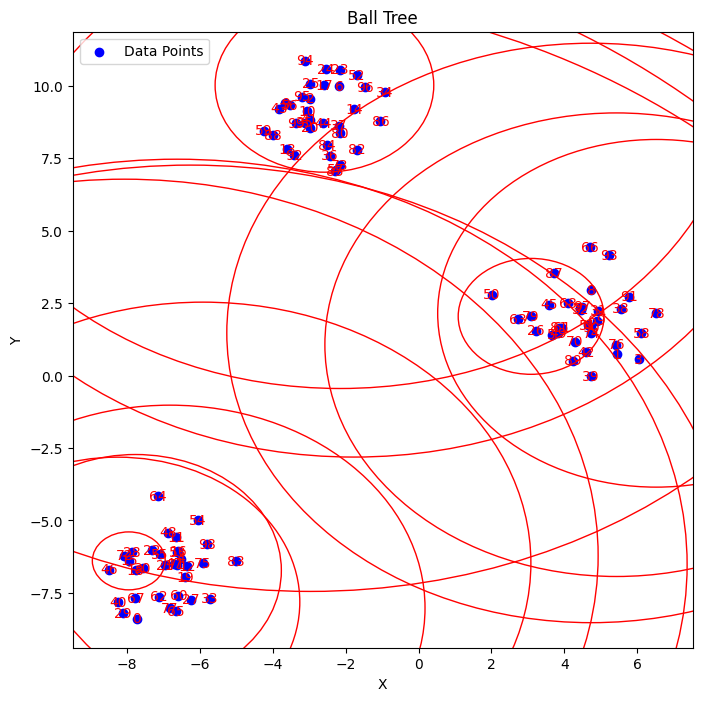

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import BallTree

# Generate a random dataset with 2D blobs
np.random.seed(42)
X, _ = make_blobs(n_samples=100, centers=3, n_features=2)

# Construct the Ball tree
balltree = BallTree(X)

# Plot the Ball tree
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(X[:, 0], X[:, 1], color='b', label='Data Points')

# Plot the Ball tree structure
for i, (center, radius) in enumerate(zip(balltree.get_arrays()[0], balltree.get_arrays()[1])):
    circle = plt.Circle((center[0], center[1]), radius, color='r', fill=False)
    ax.add_artist(circle)
    ax.annotate(i, (center[0], center[1]), color='r', ha='center', va='center')

# Set plot properties
ax.set_xlim([np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1])
ax.set_ylim([np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Ball Tree')
ax.legend()
plt.show()


# KNN Implementation

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=1000,
    n_features=3,
    n_redundant=1,
    n_classes=2,
    random_state=999
)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.33,  random_state=42)

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
classifier = KNeighborsClassifier(n_neighbors=9, algorithm='auto')
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [14]:
y_pred = classifier.predict(X_test)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [16]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9121212121212121
[[156  13]
 [ 16 145]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       169
           1       0.92      0.90      0.91       161

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid for k values to search
param_grid = {'n_neighbors': range(1, 11)}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best k value and its corresponding accuracy score
print("Best k value:", grid_search.best_params_['n_neighbors'])
print("Best accuracy:", grid_search.best_score_)


Best k value: 9
Best accuracy: 0.9029850746268657


In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
knn = KNeighborsClassifier()

# Define the range of k values to evaluate
k_values = range(1, 11)

# Perform cross-validation for each k value
cv_scores = []
for k in k_values:
    knn.n_neighbors = k
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the best k value
best_k = k_values[np.argmax(cv_scores)]
best_score = np.max(cv_scores)

# Print the best k value and its corresponding score
print("Best k value:", best_k)
print("Best accuracy:", best_score)


Best k value: 7
Best accuracy: 0.9040000000000001


### KNN regressor

Best k value: 4
Mean Squared Error: 0.05087925596382311
R2 Score: 0.9993261869341499


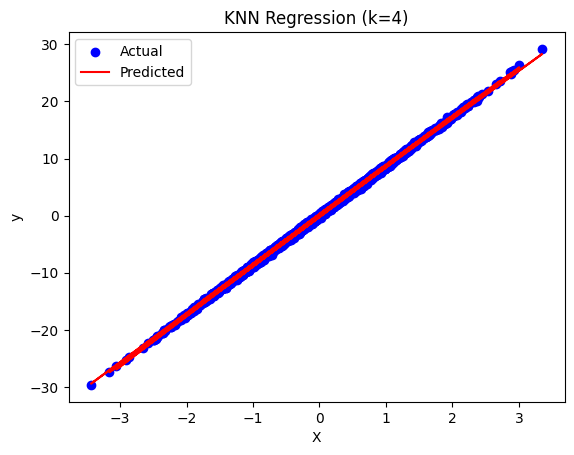

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor

# Generate regression dataset with 10,000 data points
X, y = make_regression(n_samples=10000, n_features=1, noise=0.2)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of k values
k_values = range(1, 21)

# Perform cross-validation for each k value
cv_scores = []
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_scores.append(-np.mean(scores))

# Find the best k value
best_k = k_values[np.argmin(cv_scores)]

# Train the KNN regressor with the best k value
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

from sklearn.metrics import mean_squared_error,r2_score
# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the best k value and regression metrics
print("Best k value:", best_k)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

# Visualize the regression line
plt.scatter(X_test, y_test, color='b', label='Actual')
plt.plot(X_test, y_pred, color='r', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('KNN Regression (k={})'.format(best_k))
plt.legend()
plt.show()
